# Polynomial Regression

## Importing necessary libraries and packages

In [12]:
from sklearn.preprocessing import PolynomialFeatures # regression algorithm
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

## Importing the csv file as DataFrame

In [13]:
df = pd.read_csv("Point_Values.csv")
df.head()

,Points,Values
0,-10.0,-1358
1,-9.5,-1200
2,-9.0,-1000
3,-8.5,-850
4,-8.0,-734


## Exploratory Data Analysis

Formal information about the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Points  41 non-null     float64
 1   Values  41 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 784.0 bytes


Desciption of the dataset

In [15]:
df.describe()

,Points,Values
count,41.000000,41.000000
mean,0.000000,0.000000
std,5.989574,573.598858
min,-10.000000,-1358.000000
25%,-5.000000,-203.000000
50%,0.000000,0.000000
75%,5.000000,203.000000
max,10.000000,1358.000000


Checking if any null value exists

In [16]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

Columns of the dataset

In [17]:
df.columns

Index(['Points', 'Values'], dtype='object')

Correlations between the variables

In [18]:
df.corr()

,Points,Values
Points,1.000000,0.926989
Values,0.926989,1.000000


## Now taking 2 parts from the dataset
### X: which contains only the <b>Points</b> column<br>Y: which contains only the <b>Values</b> column 

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the data

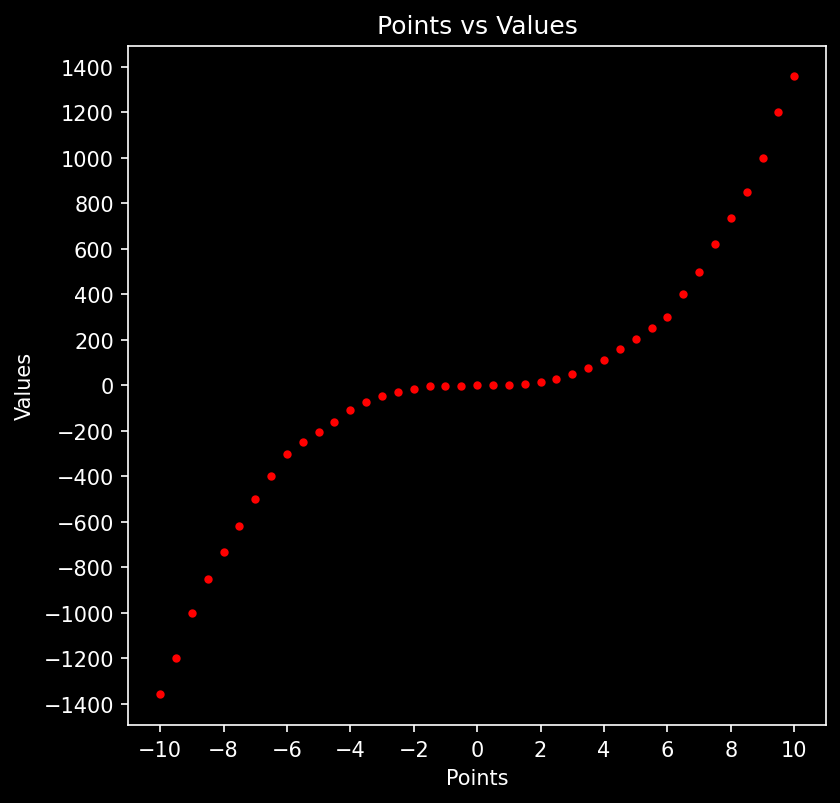

In [20]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=".", color="red")
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400,1500,200))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Points_vs_Values.png", bbox_inches='tight')

## Elbow Curve Drawing

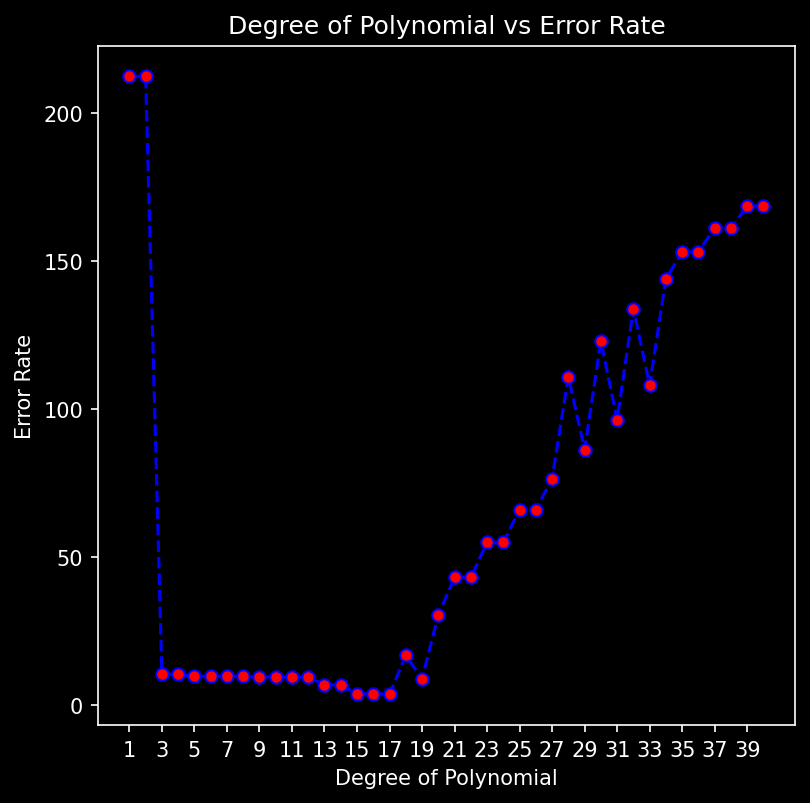

In [21]:
rmse=[]
for i in range(1, 41):
    poly_reg = PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(X)
    lin_reg= LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred= lin_reg.predict(x_poly)
    rmse.append(mean_squared_error(y, y_pred, squared=False))
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(range(1,41), rmse, linestyle='dashed', color='blue', marker='o', markerfacecolor='red')
plt.xticks(np.arange(1, 41, 2))
plt.yticks(np.arange(0,250,50))
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error Rate')
plt.title('Degree of Polynomial vs Error Rate')
plt.savefig("Images/Degree_of_Polynomial_vs_Error_Rate.png", bbox_inches='tight')

## Taking the optimal degree of the polynomial and building the model

In [22]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred = lin_reg.predict(x_poly)

## Performance of the model

In [23]:
# printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y,y_pred))
adjusted_r2_score = 1 - ((1-r2_score(y,y_pred))*(len(y)-1))/(len(y)-X.shape[1]-1)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9996528537590598
The adjusted coefficient of determination : 0.9996439525733947


## Plotting the Regression

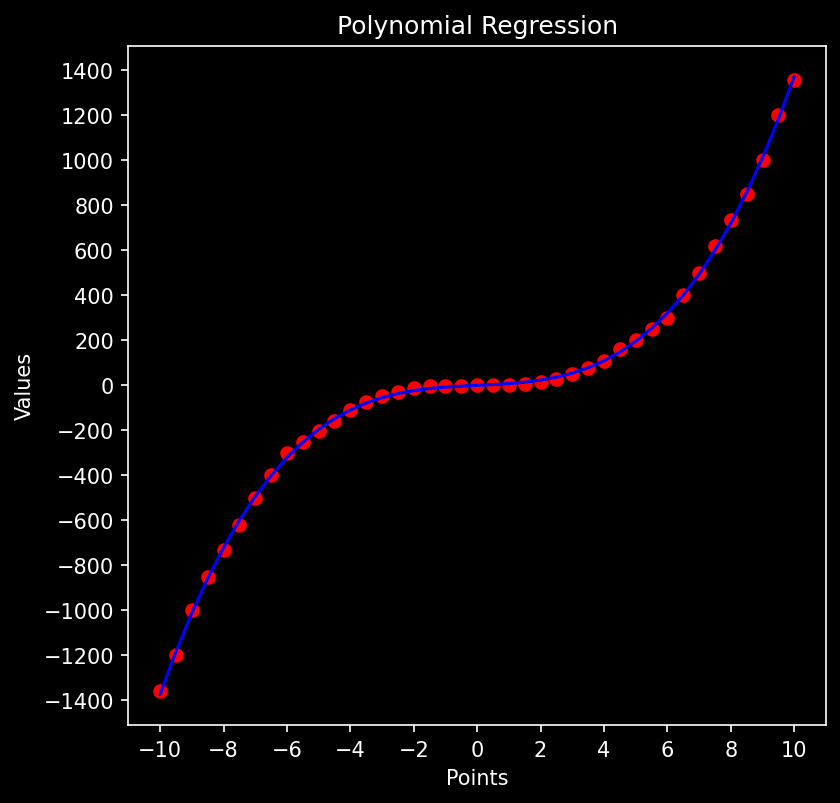

In [24]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400,1500,200))
plt.xlabel("Points")
plt.ylabel("Values")
plt.title("Polynomial Regression")
plt.savefig("Images/Polynomial_Regression.png",bbox_inches='tight')

## Additional Performance Metrics

In [25]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y, y_pred, squared=False))

Mean Absolute Error (MAE) : 8.742721696304013
Mean Squared Error (MSE) : 111.43077669074172
Root Mean Squared Error (RMSE) : 10.556077713371653
